In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.style.use('default')
sns.set()

In [5]:
df = pd.read_csv("songs.csv")

print("Shape Dataset:", df.shape)
df.head()

Shape Dataset: (900, 28)


,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,...,track_artist_merged,lyrics,artist_name,tags,tags_tokenized,doc_vector,combined_vector,cluster,image_url,spotify_url
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,Kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,...,kygo,"['bring', 'me', 'higher', 'love,', 'love', '',...",Kygo,bring higher love love bring higher love think...,"['bring', 'higher', 'love', 'love', 'bring', '...",[-0.1148182 0.27755967 0.27891365 0.143460...,[-0.1148182 0.27755967 0.27891365 0.143460...,3,https://i.scdn.co/image/ab67616d0000b2737c8977...,https://open.spotify.com/track/6oJ6le65B3SEqPw...
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),Billieeilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,...,billie eilish,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'...",Billie Eilish,yeah yeah oh ah white shirt red bloody nose sl...,"['yeah', 'yeah', 'oh', 'ah', 'white', 'shirt',...",[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,1,https://i.scdn.co/image/ab67616d0000b273a69b8b...,https://open.spotify.com/track/3yNZ5r3LKfdmjoS...
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),Samfeldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,...,sam feldt,"['one', 'more', 'drink,', 'got', 'one', 'more'...",Sam Feldt,one drink got one bacardi one dance afterparty...,"['one', 'drink', 'got', 'one', 'bacardi', 'one...",[-0.1616459 0.21872164 0.3755187 0.116120...,[-0.1616459 0.21872164 0.37551871 0.116120...,3,https://i.scdn.co/image/ab67616d0000b27354de16...,https://open.spotify.com/track/0qc4QlcCxVTGySh...
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,Elliegoulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,...,ellie goulding,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'...",Ellie Goulding,sixteen sixteen remember moved mum said love s...,"['sixteen', 'sixteen', 'remember', 'moved', 'm...",[-0.17123666 0.15697554 0.2319686 0.190121...,[-0.17123666 0.15697554 0.2319686 0.190121...,3,https://i.scdn.co/image/ab67616d0000b27394181f...,https://open.spotify.com/track/4PkIDTPGedm0enz...
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,Katyperry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,...,katy perry,"[""i'm"", 'losing', 'my', 'self', 'control', '',...",Katy Perry,im losing self control yeah youre starting tri...,"['im', 'losing', 'self', 'control', 'yeah', 'y...",[-0.26988247 0.21529263 0.3686135 0.180054...,[-0.26988247 0.21529263 0.36861351 0.180054...,3,https://i.scdn.co/image/ab67616d0000b2739bea3b...,https://open.spotify.com/track/5PYQUBXc7NYeI1o...


In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                900 non-null    int64  
 1   track_id                  900 non-null    object 
 2   track_name                900 non-null    object 
 3   track_artist              900 non-null    object 
 4   track_popularity          900 non-null    float64
 5   track_album_release_date  900 non-null    object 
 6   playlist_genre            900 non-null    object 
 7   danceability              900 non-null    float64
 8   energy                    900 non-null    float64
 9   key                       900 non-null    float64
 10  loudness                  900 non-null    float64
 11  mode                      900 non-null    float64
 12  speechiness               900 non-null    float64
 13  acousticness              900 non-null    float64
 14  liveness  

,Unnamed: 0,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,cluster
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,0.199545,0.623394,0.640775,0.484444,0.726726,0.574444,0.115008,0.225910,0.160050,0.518995,0.414709,211372.507778,1.150000
std,259.951919,0.199525,0.183919,0.181130,0.334353,0.111564,0.494702,0.133004,0.238884,0.139023,0.237509,0.208335,45092.774311,0.834963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104591.000000,0.000000
25%,224.750000,0.045455,0.504248,0.527578,0.181818,0.681972,0.000000,0.023636,0.043808,0.077727,0.334210,0.245323,181819.500000,0.000000
50%,449.500000,0.136364,0.652288,0.664127,0.454545,0.743644,1.000000,0.055262,0.140391,0.107691,0.515887,0.402658,206233.500000,1.000000
75%,674.250000,0.318182,0.749346,0.777873,0.818182,0.798564,1.000000,0.158157,0.326666,0.194965,0.705882,0.543679,232736.750000,2.000000
max,899.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,484147.000000,2.000000


In [19]:
numeric_features = ['tempo', 'energy', 'danceability', 'loudness', 'valence']
X = df[numeric_features]

In [20]:
X.isnull().sum()

X = X.fillna(X.mean())

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

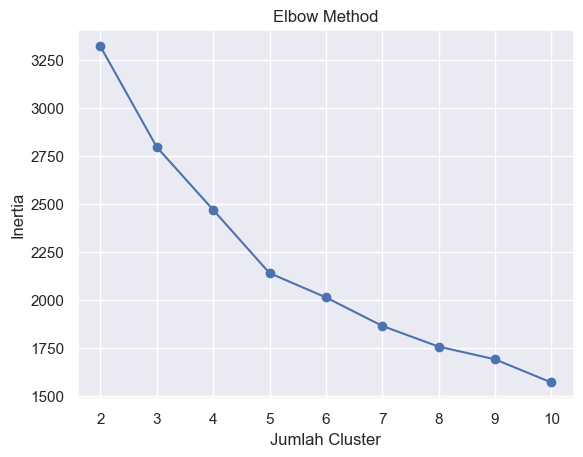

In [23]:
inertia = []
K = range(2, 11)


for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [25]:
score = silhouette_score(X_scaled, df['cluster'])
print('Silhouette Score:', score)

Silhouette Score: 0.2164258072320049


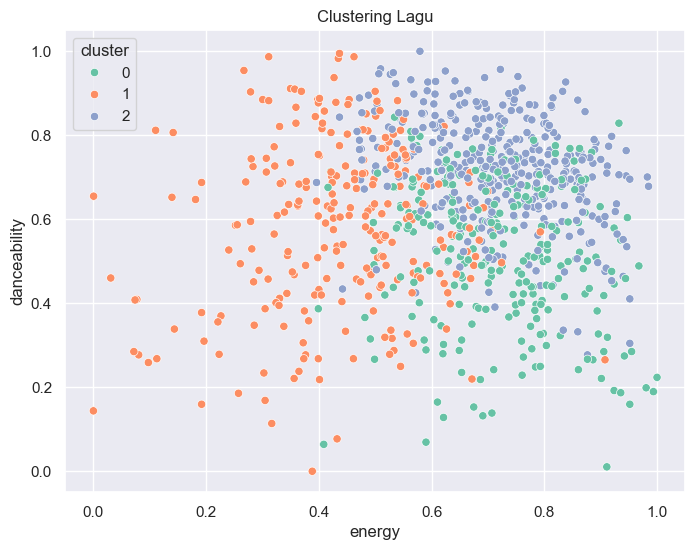

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(
x=df['energy'],
y=df['danceability'],
hue=df['cluster'],
palette='Set2'
)
plt.title('Clustering Lagu')
plt.show()

In [27]:
df.groupby('cluster')[numeric_features].mean()

,tempo,energy,danceability,loudness,valence
cluster,,,,,
0,0.618385,0.719399,0.517494,0.770890,0.469587
1,0.337902,0.435962,0.584050,0.614488,0.324569
2,0.331054,0.721823,0.718189,0.770434,0.677150


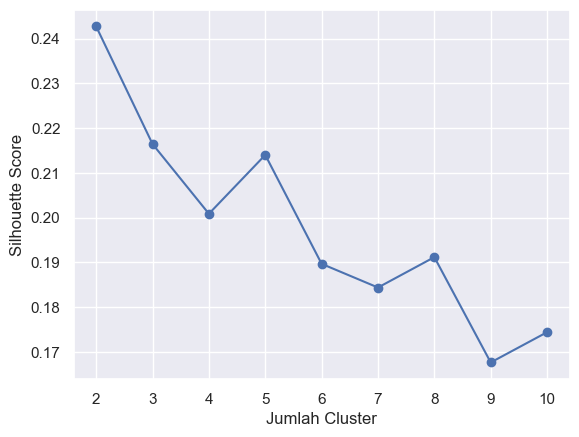

In [29]:
sil_scores = []


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))


plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()